In [12]:
from subsbml import System, createSubsystem, combineSystems, createNewSubsystem
import libsbml
import bioscrape




liposome_1_ss1 = createSubsystem('liposome_1.xml')
liposome_2_ss2 = createSubsystem('liposome_2.xml')
external_ss3 = createSubsystem('external_environment.xml')

mb1 = createSubsystem('membrane_ahl_simple1.xml', membrane = True)
mb2 = createSubsystem('membrane_ahl_simple2.xml', membrane = True)



liposome_1 = System('liposome_1')
liposome_2 = System('liposome_2')



liposome_1.setInternal([liposome_1_ss1])
liposome_1.setExternal([external_ss3])
liposome_1.setMembrane(mb1)
liposome_1.setSize(1e-06)


liposome_1_model = liposome_1.getModel(verbose = True)
liposome_1_model.writeSBML('liposome_1_model.xml')

mb2 = createSubsystem('membrane_ahl_simple2.xml', membrane = True)


liposome_2.setInternal([liposome_2_ss2])
liposome_2.setExternal([external_ss3])
liposome_2.setMembrane(mb2)
liposome_2.setSize(2e-06)



liposome_2_model = liposome_2.getModel()
liposome_2_model.writeSBML('liposome_2_model.xml')


#combined_liposome_1_2 = combineSystems([liposome_1, liposome_2])
liposome_1_model.renameCompartments('liposome_1_external', 'actual_external_compartment')
liposome_2_model.renameCompartments('liposome_2_external', 'actual_external_compartment')





combined_liposome_1_2 = createNewSubsystem()
combined_liposome_1_2.combineSubsystems([liposome_1_model, liposome_2_model], verbose = True)

    
#Liposome 1 species amount
combined_liposome_1_2.setSpeciesAmount('TRP', 10, compartment = 'liposome_1_internal')
combined_liposome_1_2.setSpeciesAmount('dna_dna_vioA', 10, compartment = 'liposome_1_internal')
combined_liposome_1_2.setSpeciesAmount('dna_dna_vioB', 10, compartment = 'liposome_1_internal')
combined_liposome_1_2.setSpeciesAmount('dna_dna_vioE', 10, compartment = 'liposome_1_internal')
combined_liposome_1_2.setSpeciesAmount('dna_dna_vioD', 10, compartment = 'liposome_1_internal')

#Liposome 2 species amount
combined_liposome_1_2.setSpeciesAmount('dna_dna_vioC', 10, compartment = 'liposome_2_internal')

combined_liposome_1_2.writeSBML('liposome_1_2_model.xml') #always export and double check

combined_liposome_1_2.changeLog

#combineSystems([liposome_1, liposome_2]).writeSBML('combineSystems_1_2.xml')


The subsystem from membrane_ahl_simple1.xml has multiple compartments
The subsystem from membrane_ahl_simple2.xml has multiple compartments
The subsystem from membrane_ahl_simple2.xml has multiple compartments


/Users/albertanis/opt/anaconda3/lib/python3.7/site-packages/subsbml-0.1-py3.7.egg/subsbml/Subsystem.py:986: UserWarning: Annotated propensity updated to: <PropensityType> type=massaction k=100.0  </PropensityType>
/Users/albertanis/opt/anaconda3/lib/python3.7/site-packages/subsbml-0.1-py3.7.egg/subsbml/Subsystem.py:986: UserWarning: Annotated propensity updated to: <PropensityType> type=massaction k=10.0  </PropensityType>
/Users/albertanis/opt/anaconda3/lib/python3.7/site-packages/subsbml-0.1-py3.7.egg/subsbml/Subsystem.py:986: UserWarning: Annotated propensity updated to: <PropensityType> type=massaction k=0.05  </PropensityType>
/Users/albertanis/opt/anaconda3/lib/python3.7/site-packages/subsbml-0.1-py3.7.egg/subsbml/Subsystem.py:986: UserWarning: Annotated propensity updated to: <PropensityType> type=massaction k=0.001  </PropensityType>
/Users/albertanis/opt/anaconda3/lib/python3.7/site-packages/subsbml-0.1-py3.7.egg/subsbml/Subsystem.py:1544: UserWarning: UnitDefinition with iden

{'actual_external_compartment': 'actual_external_compartment_combined',
 'PTVA_external_environment_model_1_combined': 'PTVA_external_environment_model_1_combined_1_combined',
 'PTDVA_external_environment_model_1_combined': 'PTDVA_external_environment_model_1_combined_1_combined',
 'kb': 'kb_combined',
 'kd': 'kd_combined',
 'r1': 'r1_combined',
 'r2': 'r2_combined'}

/Users/albertanis/opt/anaconda3/lib/python3.7/site-packages/bioscrape/sbmlutil.py:93: UserWarning: SBML model contains reversible reaction!
Please check rate expressions and ensure they are non-negative before doing stochastic simulations.
  'Please check rate expressions and ensure they are non-negative before doing '+
/Users/albertanis/opt/anaconda3/lib/python3.7/site-packages/bioscrape/sbmlutil.py:208: UserWarning: Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. Refer to the bioscrape wiki for more information.
  warnings.warn('Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. ' +


      protein_RNAase_biocrnpyler_996898  \
0                              6.000000   
1                              5.985565   
2                              5.970852   
3                              5.956143   
4                              5.941436   
...                                 ...   
5995                           0.007468   
5996                           0.007466   
5997                           0.007465   
5998                           0.007464   
5999                           0.007462   

      complex_protein_RNAase_rna_vioA_biocrnpyler_996898  \
0                                              0.000000    
1                                              0.003609    
2                                              0.007287    
3                                              0.010964    
4                                              0.014641    
...                                                 ...    
5995                                           1.498133    
599

KeyError: 'V_biocrnpyler_893799'

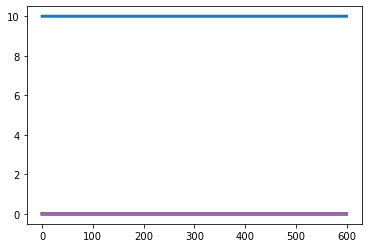

In [13]:
import numpy as np
import pylab as plt




timepoints = np.linspace(0,600,6000)


results_1,_ = combined_liposome_1_2.simulateWithBioscrape(timepoints) #,_ ignores the second output

M = bioscrape.sbmlutil.import_sbml('liposome_1_2_model.xml')
M.write_bioscrape_xml('bioscrape_xml.xml')

print(results_1)

results_1.to_csv('bioscrape data.csv')

X_id1 = combined_liposome_1_2.getSpeciesByName('TRP').getId()
X_id2 = combined_liposome_1_2.getSpeciesByName('IPA_imine').getId()
X_id3 = combined_liposome_1_2.getSpeciesByName('IPA_imine_dimer').getId()
X_id4 = combined_liposome_1_2.getSpeciesByName('PTDVA')
print(X_id4)
X_id5 = combined_liposome_1_2.getSpeciesByName('PTVA')
print(X_id5)
X_id6 = combined_liposome_1_2.getSpeciesByName('V', compartment = 'liposome_2_internal').getId()
print(X_id6)
X_id7 = combined_liposome_1_2.getSpeciesByName('DV').getId()
#print(X_id3)
#print(X_id4)
#print(X_id5)



plt.plot(timepoints, results_1[X_id1], linewidth = 3, label = 'TRP liposome 1')
plt.plot(timepoints, results_1[X_id2], linewidth = 3, label = 'IPA_imine liposome 1')
plt.plot(timepoints, results_1[X_id3], linewidth = 3, label = 'IPA_imine_dimer liposome 1')
#plt.plot(timepoints, results_1['PTDVA_external_environment_model_1_combined_1_combined'], linewidth = 3, label = 'PTDVA external')
plt.plot(timepoints, results_1['PTVA_2_combined'], linewidth = 3, label = 'PTVA liposome 1')
plt.plot(timepoints, results_1['PTVA_external_environment_model_1_combined_1_combined'], linewidth = 3, label = 'PTVA external')
plt.plot(timepoints, results_1['V_biocrnpyler_893799'], linewidth = 3, label = 'V liposome 2')
plt.plot(timepoints, results_1[X_id7], linewidth = 3, label = 'DV liposome 2')




plt.ylim(0, 10)


plt.title('Only PTVA allowed to diffuse', size=15)
plt.xlabel('Time', size=15)
plt.ylabel('[Concentration]', size = 15)
plt.legend()
plt.show()



In [ ]:
import numpy as np
import pylab as plt




timepoints = np.linspace(0,40,100)


results_1,_ = combined_liposome_1_2.simulateWithBioscrape(timepoints) #,_ ignores the second output

M = bioscrape.sbmlutil.import_sbml('liposome_1_2_model.xml')
M.write_bioscrape_xml('bioscrape_xml.xml')

print(results_1)

results_1.to_csv('bioscrape data.csv')

X_id1 = combined_liposome_1_2.getSpeciesByName('TRP').getId()
X_id2 = combined_liposome_1_2.getSpeciesByName('IPA_imine').getId()
X_id3 = combined_liposome_1_2.getSpeciesByName('IPA_imine_dimer').getId()
X_id4 = combined_liposome_1_2.getSpeciesByName('PTDVA')
print(X_id4)
X_id5 = combined_liposome_1_2.getSpeciesByName('PTVA')
print(X_id5)
X_id6 = combined_liposome_1_2.getSpeciesByName('V', compartment = 'liposome_2_internal').getId()
print(X_id6)
X_id7 = combined_liposome_1_2.getSpeciesByName('DV').getId()
#print(X_id3)
#print(X_id4)
#print(X_id5)



plt.plot(timepoints, results_1[X_id1], linewidth = 3, label = 'TRP liposome 1')
plt.plot(timepoints, results_1[X_id2], linewidth = 3, label = 'IPA_imine liposome 1')
plt.plot(timepoints, results_1[X_id3], linewidth = 3, label = 'IPA_imine_dimer liposome 1')
plt.plot(timepoints, results_1['PTDVA_external_environment_model_1_combined_1_combined'], linewidth = 3, label = 'PTDVA external')
plt.plot(timepoints, results_1['PTVA_external_environment_model_1_combined_1_combined'], linewidth = 3, label = 'PTVA external')
plt.plot(timepoints, results_1['V_biocrnpyler_244672'], linewidth = 3, label = 'V liposome 2')
plt.plot(timepoints, results_1[X_id7], linewidth = 3, label = 'DV liposome 2')




plt.ylim(0, 10)


plt.title('Both PTVA and PTDVA allowed to diffuse', size=15)
plt.xlabel('Time', size=15)
plt.ylabel('[Concentration]', size = 15)
plt.legend()
plt.show()


